The Bach chorales dataset url provided in the book was <https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/jsb_chorales/jsb_chorales.tgz>

which one can download and decompress using the next cell

In [1]:
%%bash
curl -OL https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/jsb_chorales/jsb_chorales.tgz
gunzip jsb_chorales.tgz
tar xf jsb_chorales.tar --one-top-level=jsb_chorales
rm jsb_chorales.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114k  100  114k    0     0   142k      0 --:--:-- --:--:-- --:--:--  142k


In [2]:
!ls jsb_chorales/

test  train  valid


## Play Music


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [46]:
path_csv = Path("../../datasets/jsb_chorales/train/chorale_228.csv")
df = pd.read_csv(path_csv)
df

note0  note1  note2  note3
0       69     64     61     57
1       69     64     61     57
2       69     64     61     55
3       69     64     61     55
4       69     66     61     54
..     ...    ...    ...    ...
159     69     64     61     45
160     69     64     61     45
161     69     64     61     45
162     69     64     61     45
163     69     64     61     45

[164 rows x 4 columns]

In [6]:
# sampling rate in Hz
sr = 44_100

def get_signal(*freqs, **kwargs):
    """
    """
    duration = kwargs["duration"]
    amplitude = 4096
    t = np.linspace(0, duration, int(sr*duration))
    x = np.zeros_like(t)
    for freq in freqs:
        x = x + np.sin(2*np.pi*freq*t)
    x = amplitude * x
    return x

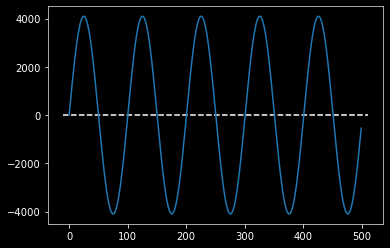

In [11]:
s0 = get_signal(440, duration=1)
n_samples = 500
plt.plot(s0[:n_samples])
plt.hlines(y=0, xmin=-10, xmax=n_samples+10, colors="white", linestyles="dashed");

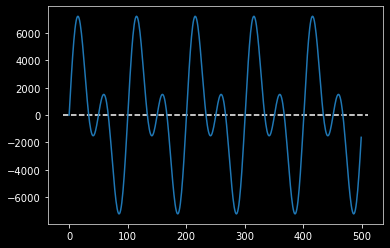

In [15]:
s0 = get_signal(*(440, 880), duration=1)
n_samples = 500
plt.plot(s0[:n_samples]);
plt.hlines(y=0, xmin=-10, xmax=n_samples+10, colors="white", linestyles="dashed");

In [16]:
from music21 import *

In [17]:
# Formula borrowed from https://gist.github.com/YuxiUx/ef84328d95b10d0fcbf537de77b936cd
def midi2freq(midi):
    a = 440
    return (a / 32) * (2 ** ((midi - 9) / 12))

In [24]:
midi2freq(np.array([60, 61]))

array([261.6255653 , 277.18263098])

In [21]:
for midi in (60, 61, 62, 72):
    print(midi2freq(midi))

261.6255653005986
277.1826309768721
293.66476791740763
523.2511306011972


In [22]:
for s in ("C4", "C#4", "D4", "C5"):
    print(note.Note(s).pitch.frequency)

261.6255653005985
277.182630976872
293.66476791740746
523.2511306011974


In [23]:
df.values

array([[69, 64, 61, 57],
       [69, 64, 61, 57],
       [69, 64, 61, 55],
       [69, 64, 61, 55],
       [69, 66, 61, 54],
       [69, 66, 61, 54],
       [69, 66, 61, 52],
       [69, 66, 61, 52],
       [69, 66, 62, 50],
       [69, 66, 62, 50],
       [69, 64, 61, 50],
       [69, 64, 61, 50],
       [71, 62, 59, 55],
       [71, 62, 59, 55],
       [71, 67, 64, 55],
       [71, 67, 64, 55],
       [69, 64, 61, 55],
       [69, 64, 61, 55],
       [69, 61, 64, 54],
       [69, 61, 64, 52],
       [74, 69, 57, 54],
       [74, 69, 57, 54],
       [74, 67, 62, 50],
       [74, 66, 62, 50],
       [76, 67, 62, 57],
       [76, 67, 62, 57],
       [76, 64, 61, 45],
       [76, 64, 61, 45],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [74, 66, 57, 50],
       [73, 69, 66, 54],
       [73, 69, 66, 54],
       [74, 69, 66, 52],
       [74, 69, 66, 52],


In [25]:
chorales = midi2freq(df.values)
chorales

array([[440.        , 329.62755691, 277.18263098, 220.        ],
       [440.        , 329.62755691, 277.18263098, 220.        ],
       [440.        , 329.62755691, 277.18263098, 195.99771799],
       [440.        , 329.62755691, 277.18263098, 195.99771799],
       [440.        , 369.99442271, 277.18263098, 184.99721136],
       [440.        , 369.99442271, 277.18263098, 184.99721136],
       [440.        , 369.99442271, 277.18263098, 164.81377846],
       [440.        , 369.99442271, 277.18263098, 164.81377846],
       [440.        , 369.99442271, 293.66476792, 146.83238396],
       [440.        , 369.99442271, 293.66476792, 146.83238396],
       [440.        , 329.62755691, 277.18263098, 146.83238396],
       [440.        , 329.62755691, 277.18263098, 146.83238396],
       [493.88330126, 293.66476792, 246.94165063, 195.99771799],
       [493.88330126, 293.66476792, 246.94165063, 195.99771799],
       [493.88330126, 391.99543598, 329.62755691, 195.99771799],
       [493.88330126, 391

In [43]:
pieces = [get_signal(*row, duration=0.3) for row in chorales]
song = np.concatenate(pieces)
song

array([   0.        ,  739.04038825, 1476.26990187, ..., -375.30349242,
        181.11394891,  739.57411097])

In [44]:
from scipy.io.wavfile import write
write("random.wav", sr, song.astype(np.int16))

In [45]:
from IPython.display import Audio
Audio("random.wav")